# Projeto Final - Machine Learning I

## Sobre o projeto

- Dataset obtido no [Kaggle](https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling)
- Os dados serão utilizados para criar modelos de classificação
- Serão apresentados 5 algoritmos diferentes (escolher): KNN, árvore de decisão, Random Forest, Gradient Boosting, Regressão Logística
- A avaliação dos modelos será realizada por meio de 4 métricas: Precisão, Recall, F1 Score, Acurácia

## Etapas iniciais

**Importando as bibliotecas**

In [219]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Abrindo o arquivo**

In [220]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Análise exploratória

**Removendo valores duplicados, caso existam**

In [221]:
df = df.drop_duplicates()

**Removendo colunas desnecessárias**

In [222]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

**Informações gerais**

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


**Transformando variáveis categóricas em dummies**

In [224]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [225]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [226]:
colunas = ['Gender', 'Geography']
for col in colunas:
    one_hot = pd.get_dummies(df[col], drop_first=True)
    df = df.drop(columns=[col])
    df = df.join(one_hot)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Exited           10000 non-null  int64  
 9   Male             10000 non-null  bool   
 10  Germany          10000 non-null  bool   
 11  Spain            10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.5 KB


In [227]:
df.isna().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
Male               0
Germany            0
Spain              0
dtype: int64

In [228]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True


**Distribuição das variáveis**

In [229]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


**Distribuição da variável alvo 'Exited'**

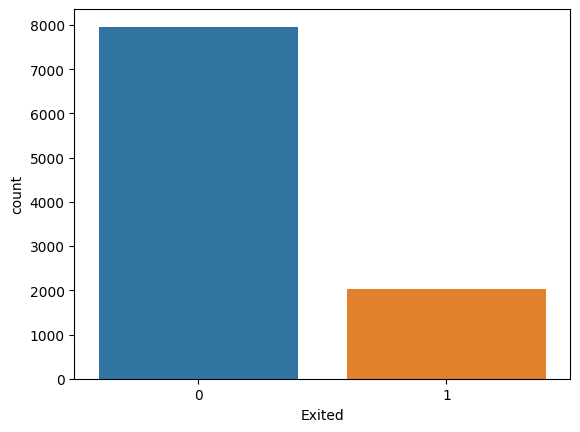

In [230]:
target = df['Exited'].value_counts()
ax = sns.countplot(x=df['Exited'])

### Identificando Outliers

In [231]:
numeric = ['Balance', "EstimatedSalary"]
df_numeric = df[numeric]
df_numeric.head()

,Balance,EstimatedSalary
0,0.00,101348.88
1,83807.86,112542.58
2,159660.80,113931.57
3,0.00,93826.63
4,125510.82,79084.10


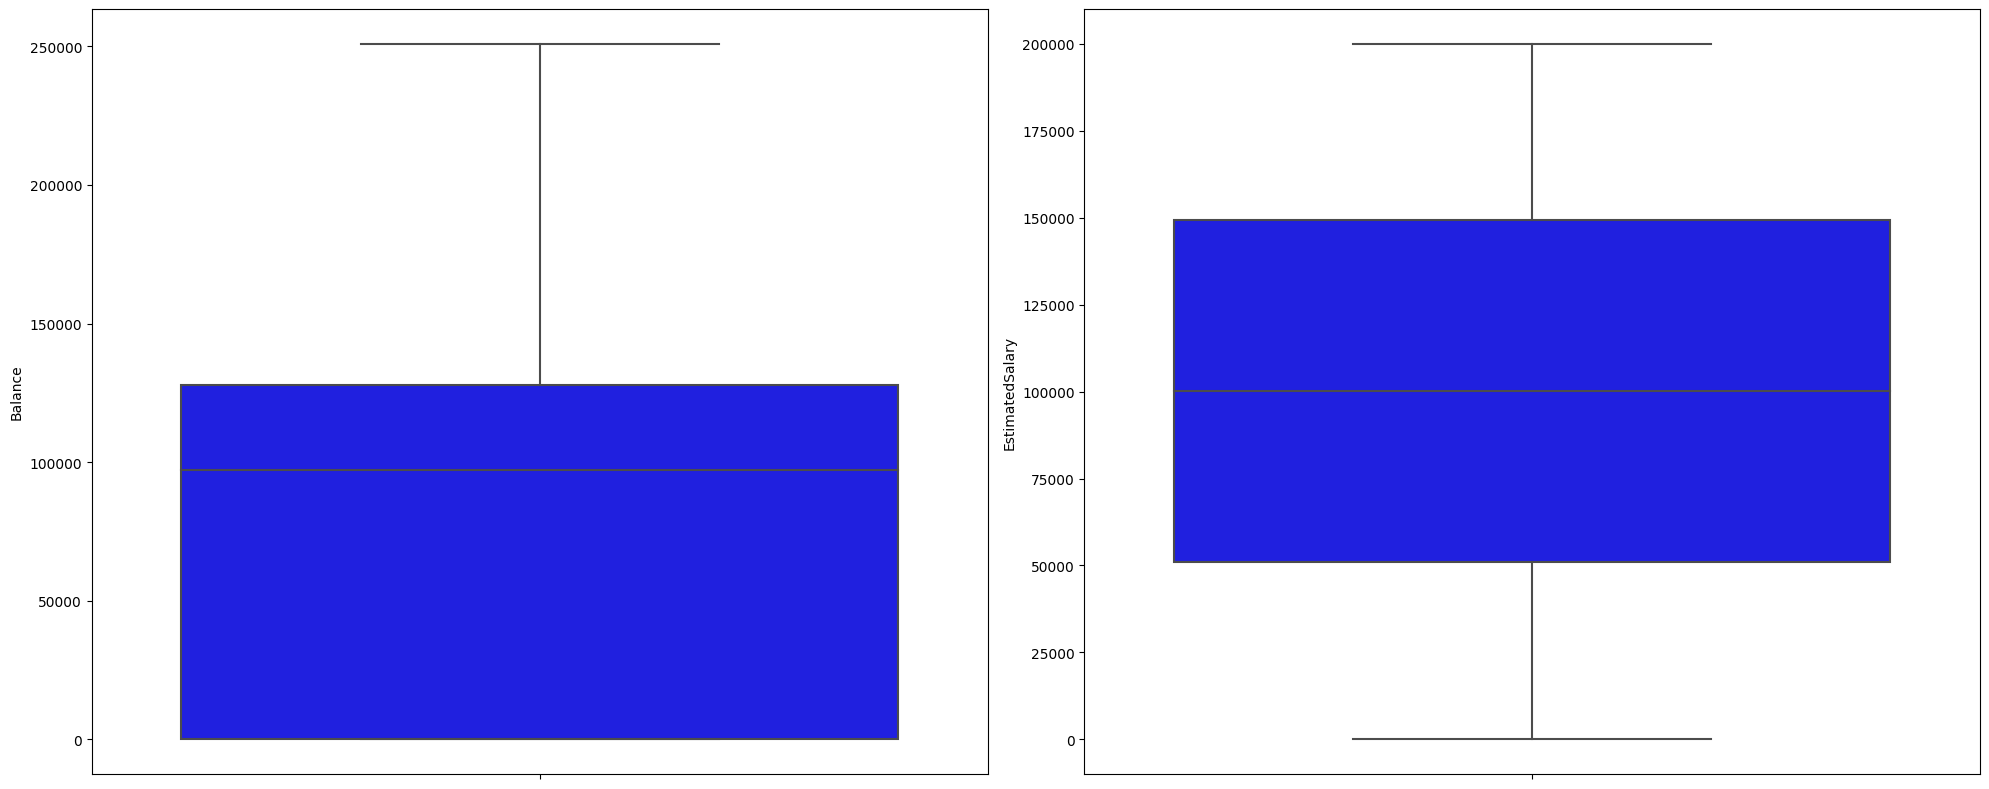

In [232]:
plt.figure(figsize=(20, 8))
for i in range(len(numeric)):
    plt.subplot(1, len(numeric), i + 1)
    sns.boxplot(y=df[numeric[i]], color='blue')
    plt.tight_layout()

In [233]:
for col in numeric:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1


    nilai_min = df[col].min()
    nilai_max = df[col].max()
    lower_lim = Q1 - (1.5*IQR)
    upper_lim = Q3 + (1.5*IQR)

    # Outliers
    if (nilai_min < lower_lim):
        print('Outliers inferiores encontrados na coluna',col,'<', lower_lim,'\n')
        print('Quantiadade de outliers inferiores na coluna',col, ':', len(list(df[df[col] < lower_lim])))
    elif (nilai_max > upper_lim):
        print('Outliers superiores encontrados na coluna',col,'>', upper_lim,'\n')
        print('Quantiadade de outliers superiores na coluna',col, ':', len(list(df[df[col] > upper_lim])))

    else:
        print('Nenhum outlier na coluna',col,'\n')


Nenhum outlier na coluna Balance 

Nenhum outlier na coluna EstimatedSalary 



### Distribuição dos Dados

C:\Users\antph\AppData\Local\Temp\ipykernel_18512\3229116523.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numeric[i]], color='orange')


C:\Users\antph\AppData\Local\Temp\ipykernel_18512\3229116523.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numeric[i]], color='orange')


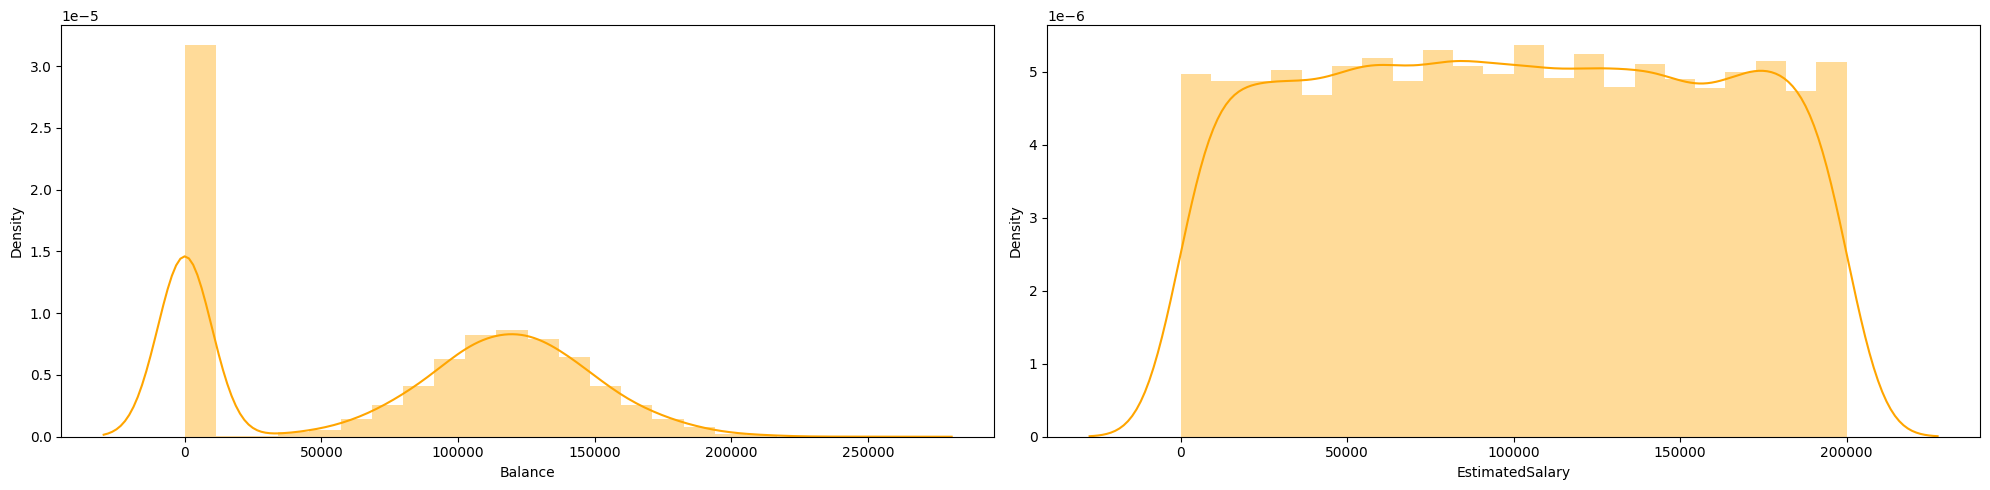

In [234]:
plt.figure(figsize=(20,5))
for i in range(0,len(numeric)):
    plt.subplot(1, len(numeric), i+1)
    sns.distplot(df[numeric[i]], color='orange')
    plt.tight_layout()

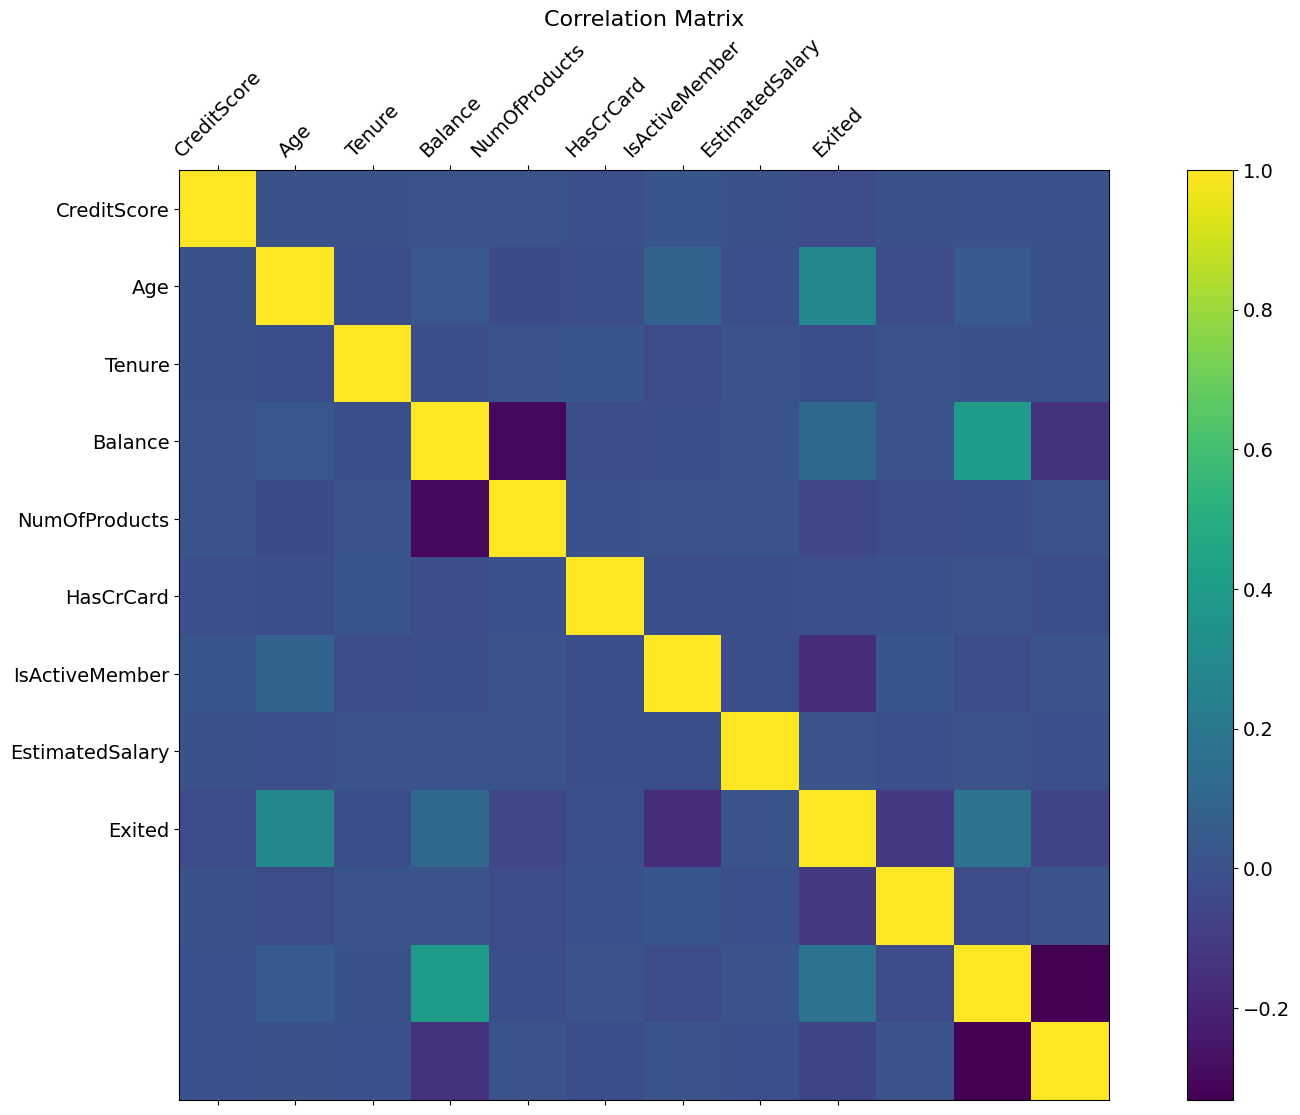

In [235]:
f = plt.figure(figsize=(20, 12))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [236]:
df_balance = df[df['Balance'] > 0]



C:\Users\antph\AppData\Local\Temp\ipykernel_18512\2805474064.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_balance[numeric[i]], color='orange')
C:\Users\antph\AppData\Local\Temp\ipykernel_18512\2805474064.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_balance[numeric[i]], color=

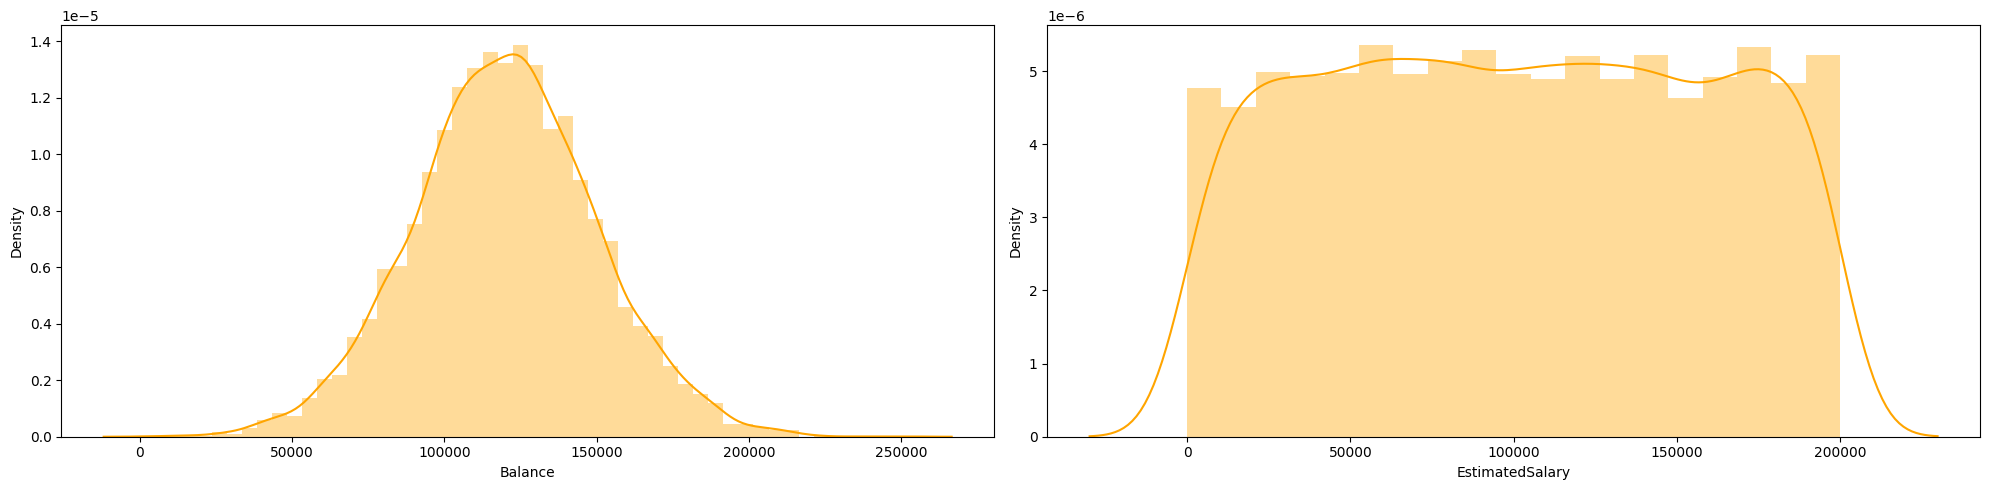

In [237]:
plt.figure(figsize=(20,5))
for i in range(0,len(numeric)):
    plt.subplot(1, len(numeric), i+1)
    sns.distplot(df_balance[numeric[i]], color='orange')
    plt.tight_layout()
    ####

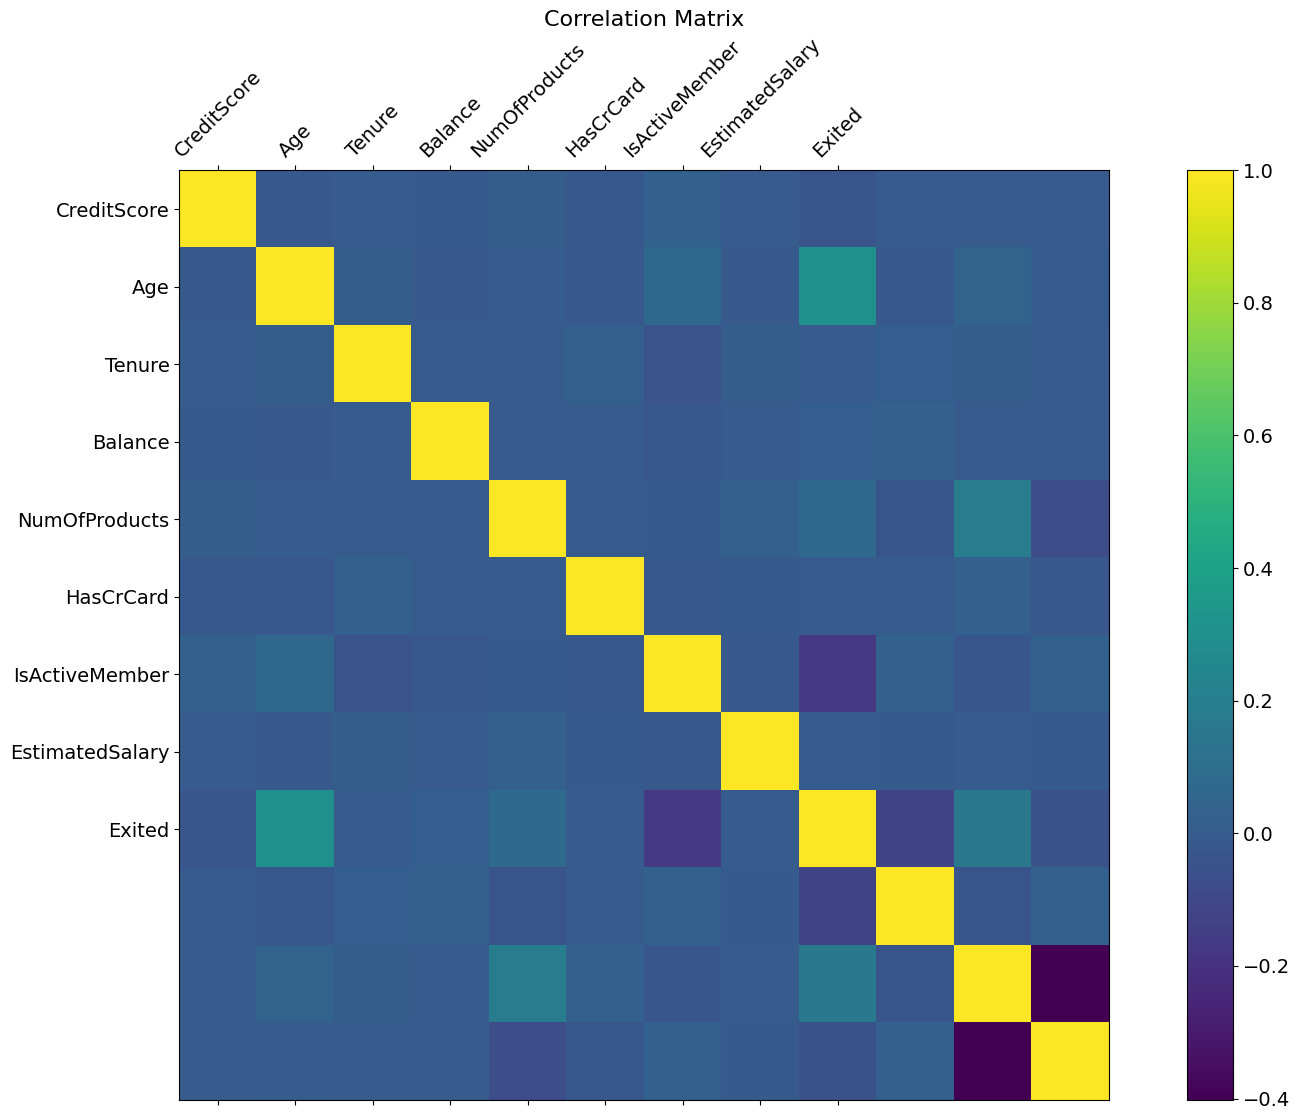

In [238]:
f = plt.figure(figsize=(20, 12))
plt.matshow(df_balance.corr(), fignum=f.number)
plt.xticks(range(df_balance.select_dtypes(['number']).shape[1]), df_balance.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_balance.select_dtypes(['number']).shape[1]), df_balance.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [239]:
df_balance.shape[0]

6383

# Modelos sem balanceamento dos dados

In [240]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier

In [241]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [242]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

Fazendo Scaling dos dados

In [243]:
scaler = MinMaxScaler(feature_range= (0,1))
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Exited'), df.Exited, test_size=0.3, random_state=1)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [244]:
pd.DataFrame(data = X_train, columns = df.columns[:-1])

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany
0,0.588,0.256757,0.8,0.000000,0.333333,1.0,0.0,0.104449,0.0,0.0,0.0
1,0.262,0.283784,0.6,0.000000,0.000000,1.0,1.0,0.123003,0.0,0.0,0.0
2,0.660,0.256757,1.0,0.493452,0.000000,1.0,0.0,0.408673,0.0,0.0,0.0
3,0.680,0.148649,0.5,0.000000,0.333333,1.0,0.0,0.542759,1.0,0.0,0.0
4,0.612,0.364865,0.7,0.581644,0.000000,1.0,1.0,0.997105,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6995,0.542,0.391892,0.7,0.427916,0.000000,1.0,1.0,0.333740,1.0,1.0,0.0
6996,0.668,0.608108,0.3,0.323820,0.000000,1.0,0.0,0.347968,0.0,1.0,0.0
6997,0.644,0.364865,0.9,0.000000,0.000000,1.0,1.0,0.459958,0.0,0.0,0.0
6998,0.626,0.283784,0.8,0.000000,0.333333,1.0,1.0,0.505692,0.0,0.0,0.0


In [245]:
def previsor(modelo,parametros=''):
  modelo.fit(X_train, y_train)
  modelo_pred = modelo.predict(X_test)
  print(classification_report(y_test, modelo_pred))
  return modelo_pred

In [246]:
#metricas
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score
metricas_db = pd.DataFrame(columns=['Precisão','Recall','F1 Score','Acurácia'],index = ['KNN','Random Forest','Árvore de Decisão','Gradient Boosting','Regressão Logística'])
metricas_b = pd.DataFrame(columns=['Precisão','Recall','F1 Score','Acurácia'],index = ['KNN','Random Forest','Árvore de Decisão','Gradient Boosting','Regressão Logística'])

In [247]:
def erros(teste,previsao,df,modelo):
    df['Precisão'][modelo] = precision_score(teste,previsao)
    df['Recall'][modelo] = recall_score(teste,previsao)
    df['F1 Score'][modelo] = f1_score(teste,previsao)
    df['Acurácia'][modelo] = accuracy_score(teste,previsao)
    return df

# Modelos treinados com bases desbalanceadas

In [248]:
model = KNeighborsClassifier(n_neighbors = 3)
pred = previsor(model)
x = erros(y_test,pred,metricas_db,'KNN')

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      2373
           1       0.52      0.32      0.40       627

    accuracy                           0.80      3000
   macro avg       0.68      0.62      0.64      3000
weighted avg       0.77      0.80      0.78      3000



In [249]:
model = RandomForestClassifier()
pred = previsor(model)
x = erros(y_test,pred,metricas_db,'Random Forest')

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2373
           1       0.78      0.46      0.58       627

    accuracy                           0.86      3000
   macro avg       0.82      0.71      0.75      3000
weighted avg       0.85      0.86      0.85      3000



In [250]:
model = DecisionTreeClassifier()
pred = previsor(model)
x = erros(y_test,pred,metricas_db,'Árvore de Decisão')

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2373
           1       0.51      0.54      0.52       627

    accuracy                           0.80      3000
   macro avg       0.69      0.70      0.70      3000
weighted avg       0.80      0.80      0.80      3000



In [251]:
from xgboost import XGBClassifier
model = XGBClassifier(objective="binary:logistic")
pred = previsor(model)
x = erros(y_test,pred,metricas_db,'Gradient Boosting')

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2373
           1       0.73      0.51      0.60       627

    accuracy                           0.86      3000
   macro avg       0.81      0.73      0.76      3000
weighted avg       0.85      0.86      0.85      3000



In [252]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
pred = previsor(model)
x = erros(y_test,pred,metricas_db,'Regressão Logística')

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2373
           1       0.67      0.20      0.31       627

    accuracy                           0.81      3000
   macro avg       0.75      0.59      0.60      3000
weighted avg       0.79      0.81      0.77      3000



# Modelos com bases balanceadas através de undersampling

In [253]:
from imblearn.under_sampling import RandomUnderSampler

In [254]:
sampler = RandomUnderSampler(random_state=26)
X = df.drop(columns='Exited')
y = df.Exited
X,y = sampler.fit_resample(X, y)


In [270]:
scaler = MinMaxScaler(feature_range=(0,1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [271]:
pd.DataFrame(data = X_train, columns = df.columns[:-1]).head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany
0,0.800,0.054054,0.3,0.484985,0.000000,1.0,0.0,0.643495,1.0,0.0,1.0
1,0.796,0.283784,0.9,0.529560,0.000000,1.0,1.0,0.298065,0.0,0.0,0.0
2,0.208,0.405405,0.5,0.577277,0.000000,1.0,1.0,0.465833,0.0,0.0,1.0
3,0.304,0.324324,0.0,0.526121,0.000000,0.0,1.0,0.140727,0.0,1.0,0.0
4,0.360,0.148649,0.5,0.000000,0.333333,0.0,0.0,0.607493,0.0,0.0,0.0


In [272]:
model = KNeighborsClassifier(n_neighbors = 3)
pred = previsor(model)
x = erros(y_test,pred,metricas_b,'KNN')

              precision    recall  f1-score   support

           0       0.68      0.69      0.68       622
           1       0.67      0.66      0.67       601

    accuracy                           0.68      1223
   macro avg       0.68      0.68      0.68      1223
weighted avg       0.68      0.68      0.68      1223



In [273]:
model = RandomForestClassifier()
pred = previsor(model)
x = erros(y_test,pred,metricas_b,'Random Forest')

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       622
           1       0.76      0.72      0.74       601

    accuracy                           0.75      1223
   macro avg       0.75      0.75      0.75      1223
weighted avg       0.75      0.75      0.75      1223



In [274]:
model = DecisionTreeClassifier()
pred = previsor(model)
x = erros(y_test,pred,metricas_b,'Árvore de Decisão')

              precision    recall  f1-score   support

           0       0.69      0.68      0.69       622
           1       0.67      0.68      0.68       601

    accuracy                           0.68      1223
   macro avg       0.68      0.68      0.68      1223
weighted avg       0.68      0.68      0.68      1223



In [275]:
from xgboost import XGBClassifier
model = XGBClassifier(objective="binary:logistic")
pred = previsor(model)
x = erros(y_test,pred,metricas_b,'Gradient Boosting')

              precision    recall  f1-score   support

           0       0.76      0.77      0.77       622
           1       0.76      0.75      0.75       601

    accuracy                           0.76      1223
   macro avg       0.76      0.76      0.76      1223
weighted avg       0.76      0.76      0.76      1223



In [276]:
model = LogisticRegression()
pred = previsor(model)
x = erros(y_test,pred,metricas_b,'Regressão Logística')

              precision    recall  f1-score   support

           0       0.70      0.71      0.71       622
           1       0.70      0.69      0.69       601

    accuracy                           0.70      1223
   macro avg       0.70      0.70      0.70      1223
weighted avg       0.70      0.70      0.70      1223



# Apresentação de Resultados

Se precisar, consulte: https://medium.com/kunumi/métricas-de-avaliação-em-machine-learning-classificação-49340dcdb198

In [277]:
def highlight_max(s):
    is_max = s == s.max()
    return ["font-weight: bold" if cell else '' for cell in is_max]

#desbalanceado
metricas_db.style.apply(highlight_max)

,Precisão,Recall,F1 Score,Acurácia
KNN,0.521851,0.323764,0.399606,0.796667
Random Forest,0.778378,0.459330,0.577733,0.859667
Árvore de Decisão,0.510606,0.537480,0.523699,0.795667
Gradient Boosting,0.732719,0.507177,0.599434,0.858333
Regressão Logística,0.668421,0.202552,0.310894,0.812333


In [278]:
#balanceado
metricas_b.style.apply(highlight_max)

,Precisão,Recall,F1 Score,Acurácia
KNN,0.673469,0.658902,0.666106,0.675388
Random Forest,0.762742,0.722130,0.741880,0.753066
Árvore de Decisão,0.674380,0.678869,0.676617,0.681112
Gradient Boosting,0.762309,0.747088,0.754622,0.761243
Regressão Logística,0.695286,0.687188,0.691213,0.698283
